# بِسْمِ اللَّهِ الرَّحْمَنِ الرَّحِيمِ      

--------------------------------------------------------------------------

# ***How i can built a machine learning project***

<img src="https://miro.medium.com/v2/resize:fit:724/1*JKhDtrILrWho1U-TEOzmYA.png" alt="Your Image" width="1000" height="100"/>


--------------------------------------------------------------------------

# ***`let's start the project`👇***

# ***Title: `Predictive Modeling for Diabetes Diagnosis` ❤***

<img src="https://apolloclinicguwahati.co.in/wp-content/uploads/2021/12/Diabetes-Heart-Diseases.jpg" alt="Your Image" width="1000" height="100"/>


### Summary: 
***`
This machine learning project aims to develop an advanced predictive model for diabetes 
diagnosis and management using a dataset containing relevant medical and lifestyle factors. Leveraging the power of artificial
intelligence, particularly machine learning algorithms, the project focuses on creating an accurate and efficient system to predict the likelihood of diabetes onset, aiding in early detection and proactive healthcare measures. The model will be trained on diverse datasets, considering various demographic factors, genetic predispositions, and lifestyle choices. Additionally, the project will explore the integration of real-time monitoring and personalized recommendations for individuals diagnosed with diabetes, contributing to a holistic approach to diabetes care. The ultimate goal is to enhance the precision of diabetes risk assessment and provide valuable insights for personalized healthcare interventions, thereby contributing to the improvement of overall public health outcomes.`***


--------------------------------------------------------------------------

# ***liberaries***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msn
import joblib
import plotly.express as px

# sklearn 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV, RandomizedSearchCV

# algorithms
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb

# metrics 
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score,classification_report, make_scorer, balanced_accuracy_score


# deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ***What is Scikit-learn ?***

<img src="https://www.analyticsvidhya.com/blog/wp-content/uploads/2015/01/ml_map.jpg" alt="Your Image" width="1000" height="100"/>


# ***Data***

In [3]:
# check the data
Data_path = r"D:\2-Machine Learning\Dataset For Machine Learning\diabetes_dataset__2019.csv"

if os.path.exists(Data_path):
    df = pd.read_csv(Data_path)
    print(df.head())
else:
    print("Data dose\'n exist")

     Age Gender Family_Diabetes highBP      PhysicallyActive   BMI Smoking  \
0  50-59   Male              no    yes        one hr or more  39.0      no   
1  50-59   Male              no    yes  less than half an hr  28.0      no   
2  40-49   Male              no     no        one hr or more  24.0      no   
3  50-59   Male              no     no        one hr or more  23.0      no   
4  40-49   Male              no     no  less than half an hr  27.0      no   

  Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood     Stress BPLevel  \
0      no      8           6              no  occasionally  sometimes    high   
1      no      8           6             yes    very often  sometimes  normal   
2      no      6           6              no  occasionally  sometimes  normal   
3      no      8           6              no  occasionally  sometimes  normal   
4      no      8           8              no  occasionally  sometimes  normal   

   Pregancies Pdiabetes UriationFreq Diabeti

In [4]:
# show the head
df.head()

Age Gender Family_Diabetes highBP      PhysicallyActive   BMI Smoking  \
0  50-59   Male              no    yes        one hr or more  39.0      no   
1  50-59   Male              no    yes  less than half an hr  28.0      no   
2  40-49   Male              no     no        one hr or more  24.0      no   
3  50-59   Male              no     no        one hr or more  23.0      no   
4  40-49   Male              no     no  less than half an hr  27.0      no   

  Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood     Stress BPLevel  \
0      no      8           6              no  occasionally  sometimes    high   
1      no      8           6             yes    very often  sometimes  normal   
2      no      6           6              no  occasionally  sometimes  normal   
3      no      8           6              no  occasionally  sometimes  normal   
4      no      8           8              no  occasionally  sometimes  normal   

   Pregancies Pdiabetes UriationFreq Diabetic  
0         0.0         0     not much       no  
1         0.0         0     not much       no  
2         0.0         0     not much       no  
3         0.0         0     not much       no  
4         0.0         0     not much       no

# ***Features Explaination***

## `Age`: Age group of the individual.
    
## `Gender`: Gender of the individual.
    
## `Family_Diabetes`: Indicates whether there is a history of diabetes in the family (yes/no).
    
## `highBP`: Indicates whether the individual has high blood pressure (yes/no).
    
## `PhysicallyActive`: Level of physical activity.
    
## `BMI`: Body Mass Index of the individual.
    
## `Smoking`: Smoking status (yes/no).
    
## `Alcohol`: Alcohol consumption (yes/no).
    
## `Sleep`: Average hours of sleep per day.
    
## `SoundSleep`: Quality of sleep (yes/no).
    
## `RegularMedicine`: Whether the individual takes regular medicine (yes/no).
    
## `JunkFood`: Frequency of consuming junk food.
    
## `Stress`: Level of stress.
    
## `BPLevel`: Blood pressure level.
    
## `Pregancies`: Number of pregnancies (applicable to females).
    
## `Pdiabetes`: Whether the individual has diabetes during pregnancy (yes/no).
    
## `UriationFreq`: Frequency of urination.
    
## `Diabetic`: Whether the individual is diabetic (yes/no).

In [5]:
# some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

# ***Exploratory Data Analysis*** 🎨

In [6]:
# check nulls using pandas 
df.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

<Axes: >

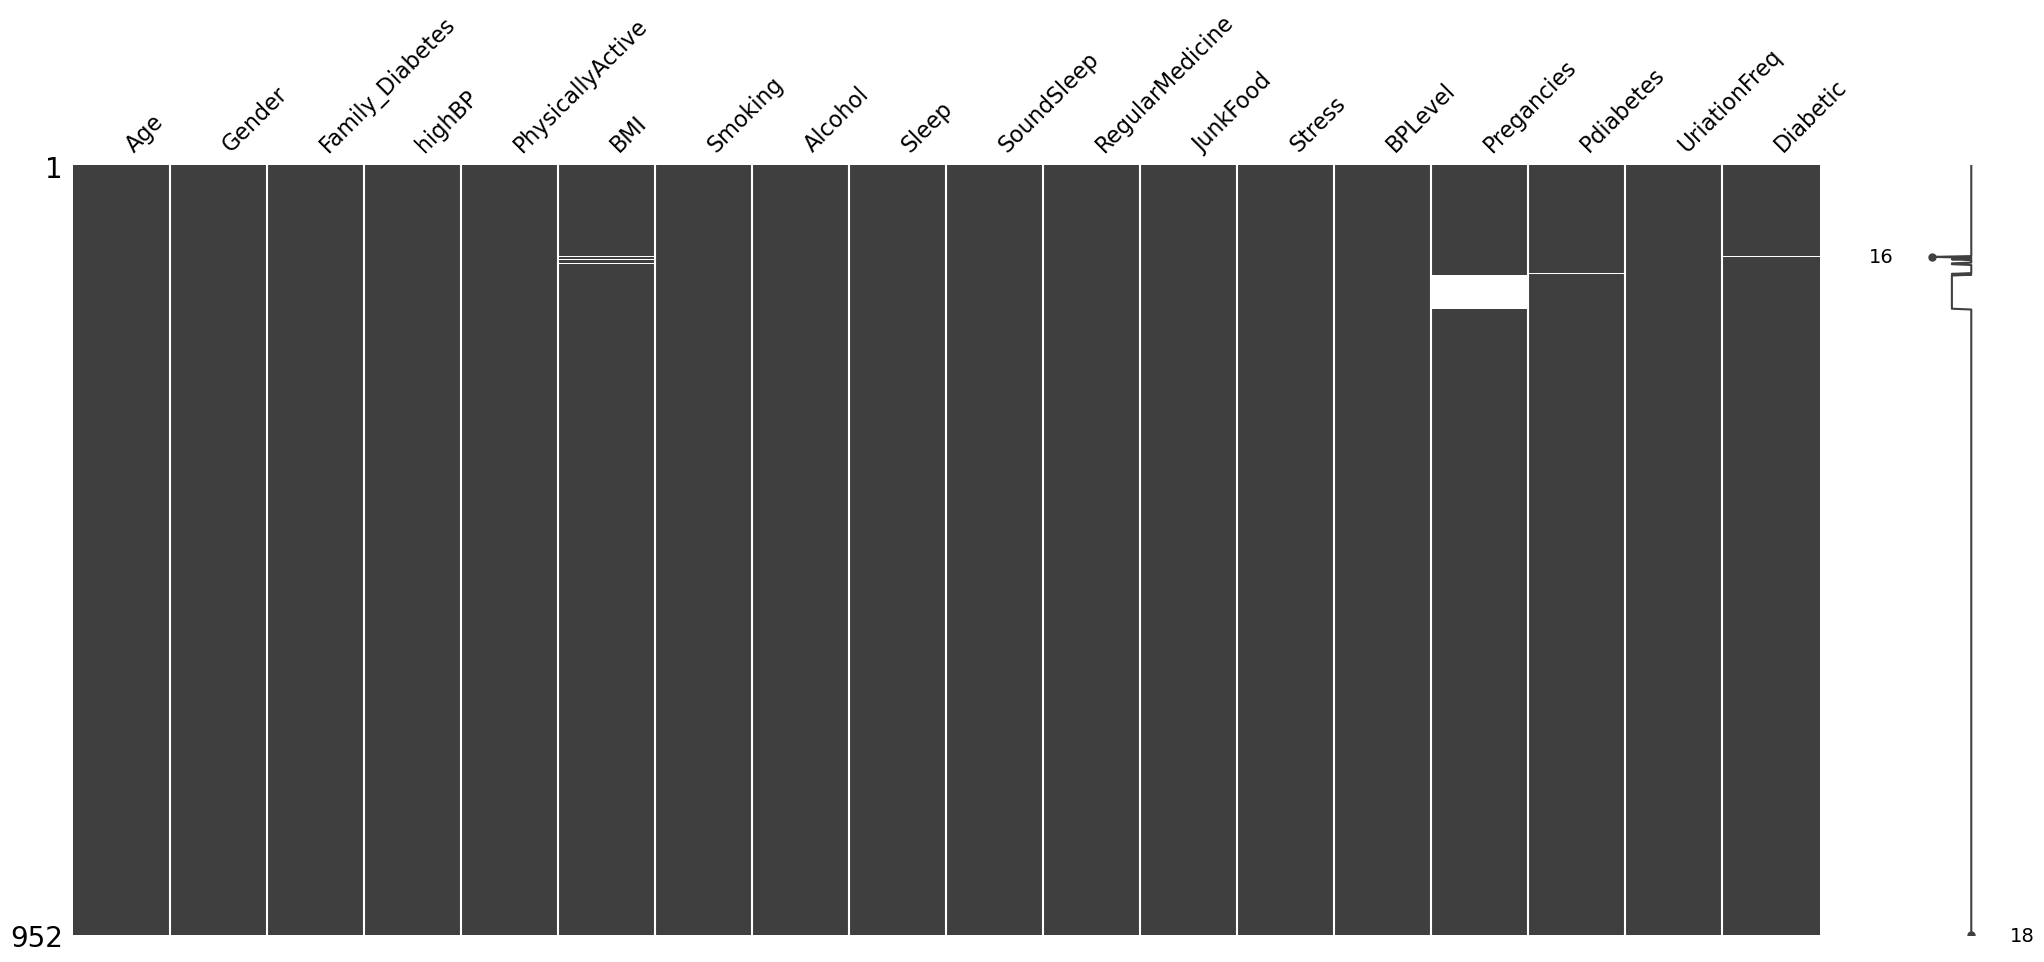

In [9]:
# check nulls using missingno
msn.matrix(df)

In [10]:
df.head(7)

Age Gender Family_Diabetes highBP      PhysicallyActive   BMI  \
0         50-59   Male              no    yes        one hr or more  39.0   
1         50-59   Male              no    yes  less than half an hr  28.0   
2         40-49   Male              no     no        one hr or more  24.0   
3         50-59   Male              no     no        one hr or more  23.0   
4         40-49   Male              no     no  less than half an hr  27.0   
5         40-49   Male              no    yes                  none  21.0   
6  less than 40   Male              no     no        one hr or more  24.0   

  Smoking Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood     Stress  \
0      no      no      8           6              no  occasionally  sometimes   
1      no      no      8           6             yes    very often  sometimes   
2      no      no      6           6              no  occasionally  sometimes   
3      no      no      8           6              no  occasionally  sometimes   
4      no      no      8           8              no  occasionally  sometimes   
5      no     yes     10          10              no  occasionally  sometimes   
6      no      no      8           8              no  occasionally  sometimes   

  BPLevel  Pregancies Pdiabetes UriationFreq Diabetic  
0    high         0.0         0     not much       no  
1  normal         0.0         0     not much       no  
2  normal         0.0         0     not much       no  
3  normal         0.0         0     not much       no  
4  normal         0.0         0     not much       no  
5    high         0.0         0     not much      yes  
6  normal         0.0         0     not much       no

In [7]:
df["Diabetic"] = df["Diabetic"].replace(' no', 'no')

# Create the count plot with Plotly
fig = px.histogram(df, x="Age", color="Diabetic", barmode="overlay", title="Age Distribution")

# Show the plot
fig.show()


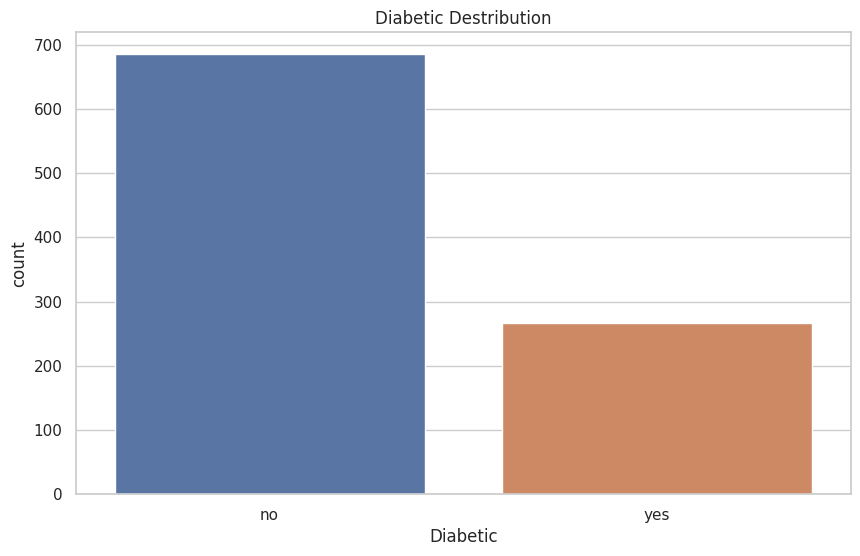

In [109]:
# Diabetic destribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Diabetic")
plt.title("Diabetic Destribution")
plt.show()

In [110]:
Gender_count = df["Gender"].value_counts()
Gender_count

Gender
Male      580
Female    372
Name: count, dtype: int64

In [113]:
# Gender perentage
labels = ["Male", "Female"]
values = [Gender_count.values[0], Gender_count.values[1]]

# Create the pie chart with Plotly
fig = px.pie(names=labels, values=values, title="Gender Percentage", 
             labels={"names": "Gender", "values": "Percentage"},
             hole=0.3)

# Show the plot
fig.show()

In [22]:
#  Histogram of Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



In [23]:
#  Box Plot of BMI
fig = px.box(df, x='BMI', title='Distribution of BMI', labels={'BMI': 'BMI'})

# Show the plot
fig.show()

In [24]:
#  Count Plot for High Blood Pressure
plt.figure(figsize=(10, 6))
sns.countplot(x='highBP', data=df)
plt.title('High Blood Pressure Distribution')
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



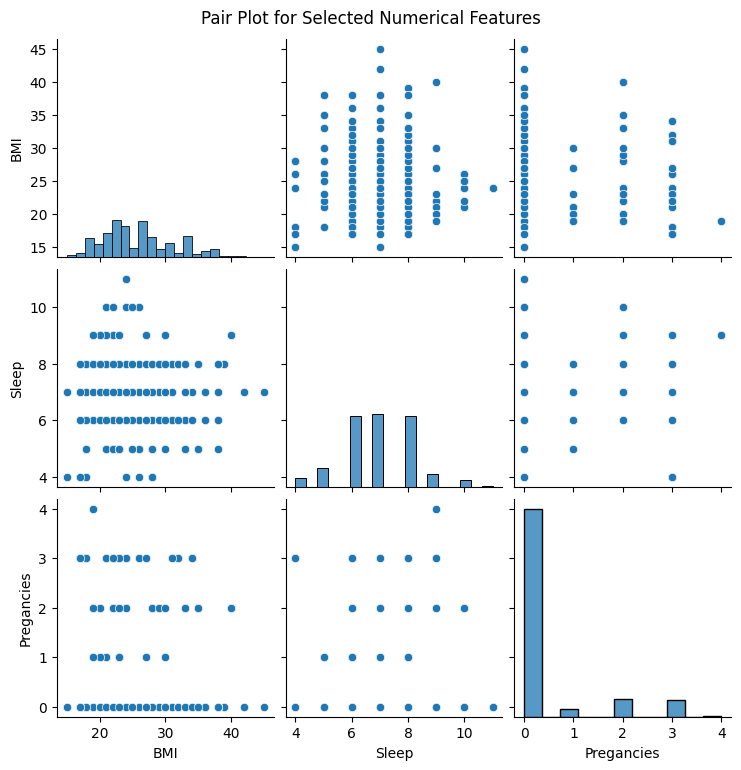

In [25]:
#  Pair Plot for Selected Numerical Features
selected_features = ['BMI', 'Sleep', 'Pregancies']
sns.pairplot(df[selected_features])
plt.suptitle('Pair Plot for Selected Numerical Features', y=1.02)
plt.show()

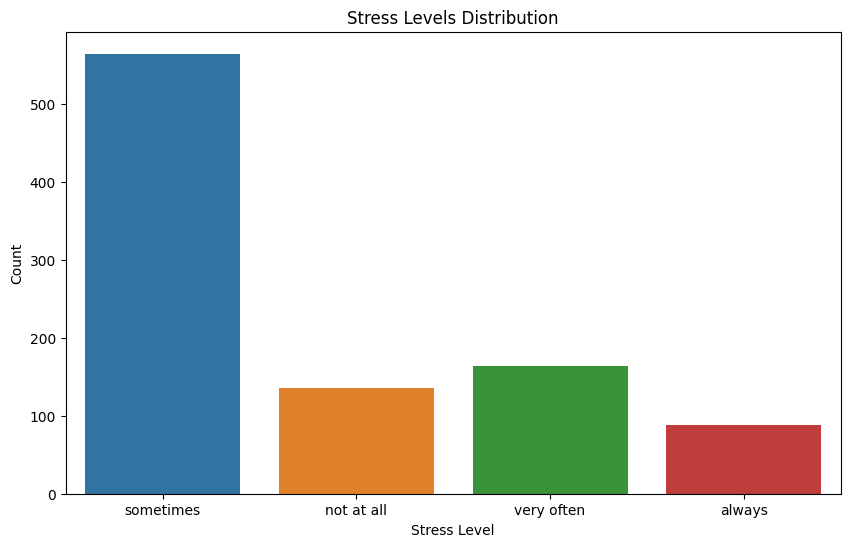

In [26]:
#  Bar Chart for Stress Levels
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress', data=df)
plt.title('Stress Levels Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

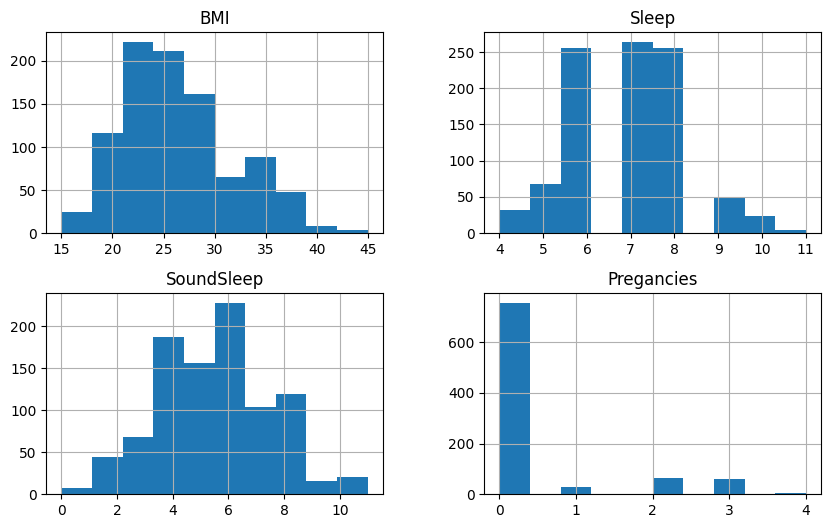

In [27]:
# histograme to the numeric colunms
df.hist(figsize=(10, 6))
plt.show()

# ***Data Preprocessing🛠***

In [8]:
# replace some values
df["Pdiabetes"] = df["Pdiabetes"].replace('0', 'no')
df["BPLevel"] = df["BPLevel"].replace('normal ', 'normal')
df["BPLevel"] = df["BPLevel"].replace('High', 'high')
df["BPLevel"] = df["BPLevel"].replace('Low', 'low')
df["RegularMedicine"] = df["RegularMedicine"].replace('o', 'no')

In [9]:
# Drop the nulls
df = df.dropna()

In [10]:
# check the nulls 
df.isna().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

In [11]:
# function to get the dtype for the columns
def get_dtype():
    
    # get the categorical features
    categorical_features = [col for col in df.columns if df[col].dtype==object]
    # get the numerical features
    numerical_features = [col for col in df.columns if df[col].dtype!=object]
    
    if categorical_features and numerical_features:
        return categorical_features, numerical_features
    
    elif categorical_features:
        return categorical_features
    
    elif numerical_features:
        return numerical_features

categorical_features, numerical_features = get_dtype()

In [12]:
# get the categorical features
categorical_features

['Age',
 'Gender',
 'Family_Diabetes',
 'highBP',
 'PhysicallyActive',
 'Smoking',
 'Alcohol',
 'RegularMedicine',
 'JunkFood',
 'Stress',
 'BPLevel',
 'Pdiabetes',
 'UriationFreq',
 'Diabetic']

In [13]:
# get the numerical features
numerical_features

['BMI', 'Sleep', 'SoundSleep', 'Pregancies']

In [14]:
df.sample(7)

Age  Gender Family_Diabetes highBP      PhysicallyActive   BMI  \
523         50-59  Female             yes    yes  more than half an hr  40.0   
661  less than 40  Female              no     no  more than half an hr  19.0   
82   less than 40  Female              no     no  less than half an hr  17.0   
188  less than 40    Male              no     no  more than half an hr  25.0   
550         50-59    Male             yes    yes                  none  31.0   
232         40-49    Male             yes    yes        one hr or more  22.0   
767  less than 40    Male              no     no  more than half an hr  26.0   

    Smoking Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood  \
523      no      no      9           5             yes    very often   
661      no      no      7           7              no  occasionally   
82       no      no      4           4              no  occasionally   
188     yes     yes      7           5              no         often   
550      no     yes      7           6             yes  occasionally   
232      no      no      7           6             yes  occasionally   
767     yes     yes      8           6              no  occasionally   

        Stress BPLevel  Pregancies Pdiabetes UriationFreq Diabetic  
523  sometimes    high         2.0       yes     not much      yes  
661  sometimes  normal         0.0        no     not much       no  
82   sometimes  normal         0.0        no  quite often       no  
188  sometimes  normal         0.0        no  quite often       no  
550     always    high         0.0        no     not much      yes  
232  sometimes    high         0.0        no     not much      yes  
767  sometimes  normal         0.0        no     not much       no

In [15]:
# show the unique values in the categorical features
for i in categorical_features:
    print(f"the unique values for ({i}) is {df[i].unique()}")
    print("--"*50)

the unique values for (Age) is ['50-59' '40-49' 'less than 40' '60 or older']
----------------------------------------------------------------------------------------------------
the unique values for (Gender) is ['Male' 'Female']
----------------------------------------------------------------------------------------------------
the unique values for (Family_Diabetes) is ['no' 'yes']
----------------------------------------------------------------------------------------------------
the unique values for (highBP) is ['yes' 'no']
----------------------------------------------------------------------------------------------------
the unique values for (PhysicallyActive) is ['one hr or more' 'less than half an hr' 'none' 'more than half an hr']
----------------------------------------------------------------------------------------------------
the unique values for (Smoking) is ['no' 'yes']
--------------------------------------------------------------------------------------------------

In [16]:
# encode the categorical features
for col in categorical_features:
    df.loc[:, col] = LabelEncoder().fit_transform(df.loc[:, col])

![](https://www.statology.org/wp-content/uploads/2022/08/labelencode2-1.jpg)

In [17]:
# show the unique values for the categorical features after encoded it
for i in categorical_features:
    print(f"the unique values for ({i}) is {df[i].unique()}")
    print("--"*50)

the unique values for (Age) is [1 0 3 2]
----------------------------------------------------------------------------------------------------
the unique values for (Gender) is [1 0]
----------------------------------------------------------------------------------------------------
the unique values for (Family_Diabetes) is [0 1]
----------------------------------------------------------------------------------------------------
the unique values for (highBP) is [1 0]
----------------------------------------------------------------------------------------------------
the unique values for (PhysicallyActive) is [3 0 2 1]
----------------------------------------------------------------------------------------------------
the unique values for (Smoking) is [0 1]
----------------------------------------------------------------------------------------------------
the unique values for (Alcohol) is [0 1]
----------------------------------------------------------------------------------------

<Axes: >

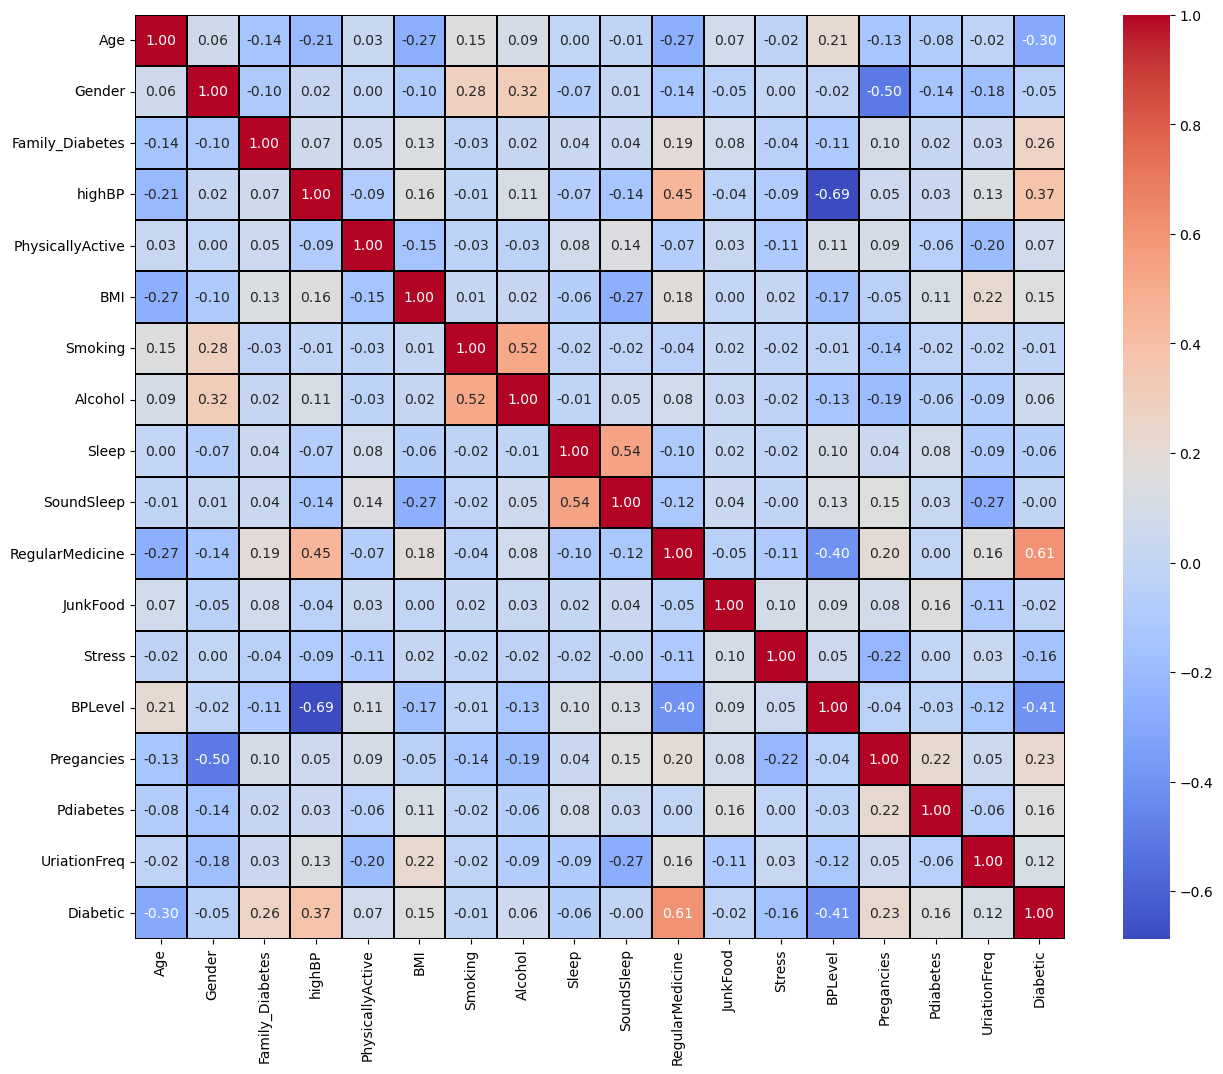

In [18]:
# heatmap to show the correlation between the features and the target
plt.figure(figsize=(15, 12))
sns.heatmap(data=df.corr(), annot=True, fmt="0.2f", linecolor="k", 
            linewidths=0.2, cmap="coolwarm")

In [19]:
# split to features and target data
X = df.drop(columns=["Diabetic"])  # features
y = df["Diabetic"]  # target

In [20]:
# make normalization to the data
data_normalized = MinMaxScaler().fit_transform(X)

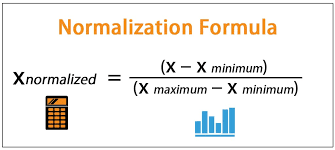


In [21]:
data_normalized

array([[0.33333333, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.66666667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.        , 1.        , ..., 0.5       , 0.        ,
        1.        ]])

<img src="https://i.stack.imgur.com/1AxJq.png" width="1200" height="300">


# ***Split The Data***

In [22]:
y = y.astype(int)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_normalized, y, random_state=42, test_size=0.3, shuffle=True)

In [24]:
print(f"The X_train shape == {X_train.shape}")
print(f"The y_train shape == {y_train.shape}")
print(f"The X_test shape == {X_test.shape}")
print(f"The y_test shape == {y_test.shape}")

The X_train shape == (633, 17)
The y_train shape == (633,)
The X_test shape == (272, 17)
The y_test shape == (272,)


# ***Model and Hyperparameter tuninning***

### `RandomForestClassifier`

In [25]:
# Random Forest
RandomForest = RandomForestClassifier()

params = {
    "n_estimators": np.arange(100, 300, 50),
    "max_depth": np.arange(5, 15, 3),
    "min_samples_split": np.arange(2, 10, 2),
    "min_samples_leaf": np.arange(1, 5, 1),
    "criterion": ["gini", "entropy", "log_loss"]
}

score = make_scorer(balanced_accuracy_score)

RandomSearch = GridSearchCV(estimator=RandomForest, param_grid=params, cv=5,
                           n_jobs=-1, verbose=1, scoring=score)

RandomSearch.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 5,  8, 11, 14]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 150, 200, 250])},
             scoring=make_scorer(balanced_accuracy_score), verbose=1)

# ***GridSearch***


<img src="https://www.researchgate.net/publication/364312986/figure/fig3/AS:11431281157924082@1683944450223/Schematic-tree-of-GridSearchCV-hyperparameter-tuning-algorithm.png" width="1200" height="300">


In [26]:
# show the best parameters
RandomSearch.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [27]:
# make the model 
RandomForestModel = RandomSearch.best_estimator_

In [28]:
# make cross validation
cross_validation = cross_val_score(estimator=RandomForestModel, X=X_train, y=y_train, scoring="balanced_accuracy",
                                  cv=5, n_jobs=-1)
print(f"The Scores is ==> {cross_validation}")
print("--"*50)
print(f"The Mean Of The Scores is ==> {cross_validation.mean()}")

print("**"*50)

# make cross validation to predict
cross_validation_pred = cross_val_predict(estimator=RandomForestModel, X=X_train, y=y_train, method="predict",
                                         cv=5, n_jobs=-1)

The Scores is ==> [0.89429429 0.853003   0.91891892 0.95277778 0.92222222]
----------------------------------------------------------------------------------------------------
The Mean Of The Scores is ==> 0.9082432432432432
****************************************************************************************************


# ***Cross validation***

<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/62d92d2524865182802b60ce_K-fold%20cross-validation.jpg" width="1200" height="300">


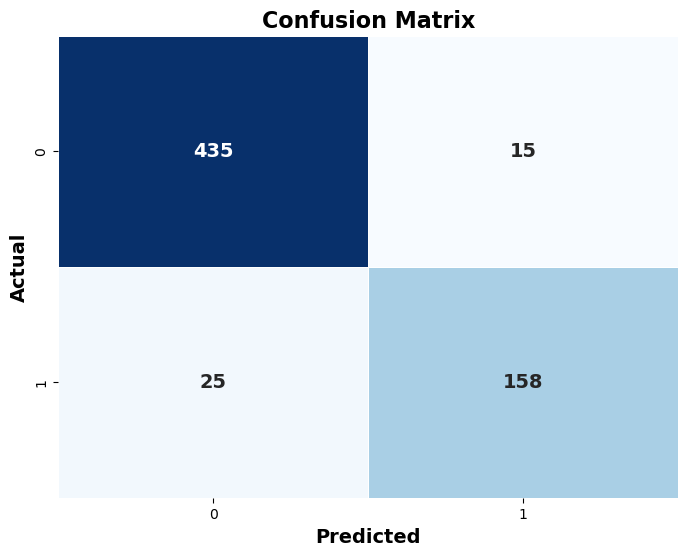

In [29]:
# Compute the confusion matrix
confusion = confusion_matrix(y_train, cross_validation_pred)

# Create a heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

 # ***Confusion matrix***

<img src="https://miro.medium.com/v2/resize:fit:667/1*3yGLac6F4mTENnj5dBNvNQ.jpeg" width="1200" height="300">


In [30]:
# show the feature importance 
importance = RandomForestModel.feature_importances_
importance

array([0.16044217, 0.01582007, 0.04753439, 0.03065345, 0.061545  ,
       0.10519225, 0.00900926, 0.01796759, 0.05522934, 0.08080495,
       0.18386063, 0.02798326, 0.05935877, 0.07108665, 0.03602107,
       0.0190892 , 0.01840195])

In [31]:
# columns
columns = X.columns

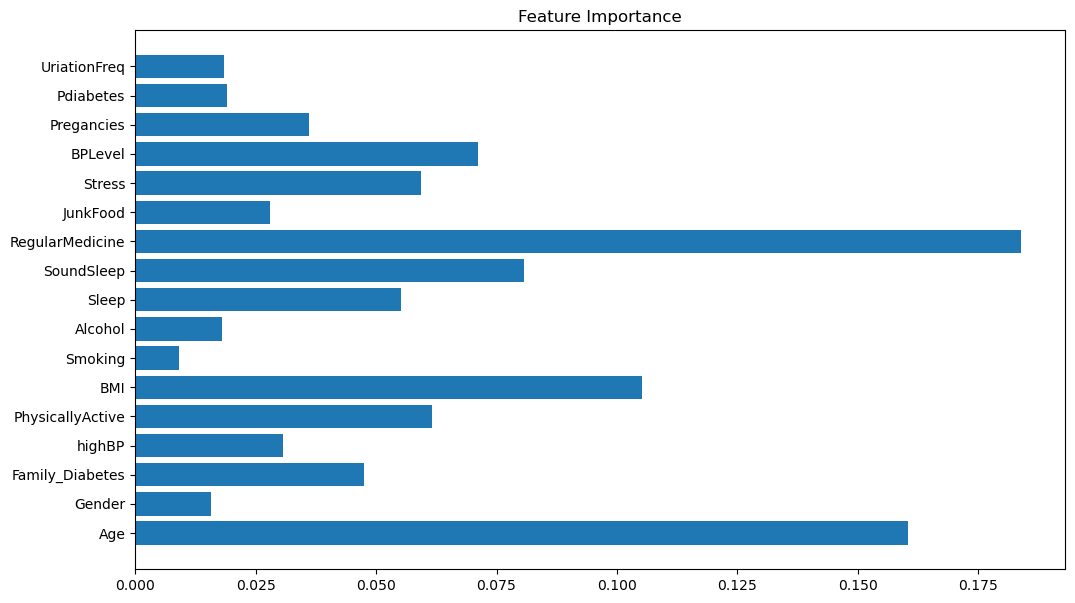

In [32]:
# plot the Feature Importance
plt.figure(figsize=(12, 7))
plt.barh(y=columns, width=importance)
plt.title("Feature Importance")
plt.show()

In [33]:
# make prediction
y_pred_RandomForest = RandomForestModel.predict(X_test)
y_pred_RandomForest


array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [34]:
# prediction
pd.DataFrame(np.c_[y_pred_RandomForest, y_test], columns=["prediction", "Actual"])

prediction  Actual
0             1       1
1             0       0
2             0       1
3             1       1
4             1       1
..          ...     ...
267           0       0
268           0       0
269           1       1
270           1       1
271           1       1

[272 rows x 2 columns]

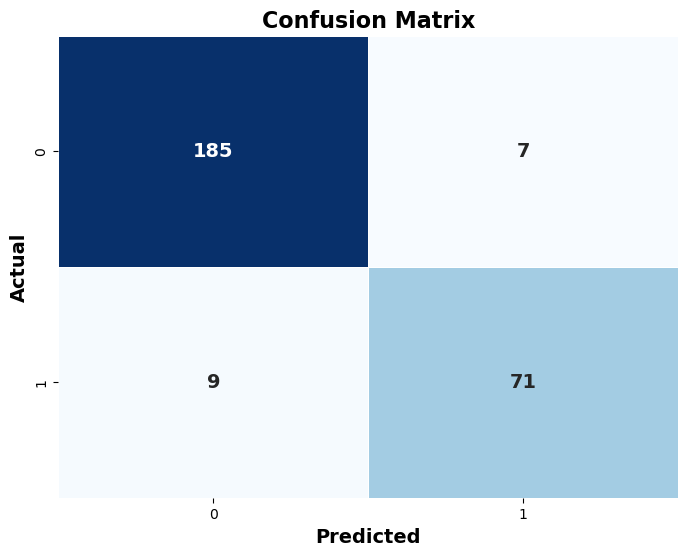

In [35]:
# Compute the confusion matrix on the test
confusion = confusion_matrix(y_test, y_pred_RandomForest)

# Create a heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [36]:
print("\033[1mThe Classification Report on Test Data\033[0m\n")
classification_rep = classification_report(y_test, y_pred_RandomForest)
print(classification_rep)

The Classification Report on Test Data

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       192
           1       0.91      0.89      0.90        80

    accuracy                           0.94       272
   macro avg       0.93      0.93      0.93       272
weighted avg       0.94      0.94      0.94       272



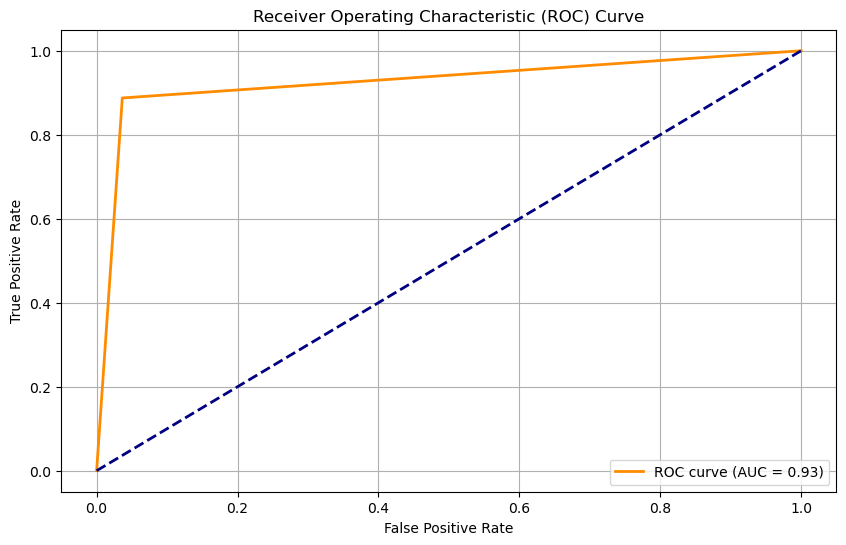

In [37]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RandomForest)
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_RandomForest)
average_precision = average_precision_score(y_test, y_pred_RandomForest)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

------------------------------------------------


<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*pk05QGzoWhCgRiiFbz-oKQ.png" width="800" height="200">





<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*HgxNKuUwXk9JHYBCt_KZNw.png" width="800" height="200">




                

<img src="https://miro.medium.com/v2/resize:fit:492/format:webp/1*f7NmMcQtfes1ng7jtjNtHQ.png" width="800" height="200">



In [38]:
# the scores
print(f"The Score On The Train => {RandomForestModel.score(X_train, y_train)*100:0.2f} %")
print(f"The Score On The Test => {RandomForestModel.score(X_test, y_test)*100:0.2f} %")

The Score On The Train => 97.95 %
The Score On The Test => 94.12 %


### `XGboost`

In [67]:
# XGboost Model
XgboostModel = xgb.XGBClassifier()

params = {
    "n_estimators" : np.arange(50, 200, 10),
    "max_depth" : np.arange(2, 10, 1),
    "learning_rate" : np.arange(0.1, 1, 0.1),
    "subsample" : np.arange(0.2, 1, 0.25),
    "alpha" :  np.arange(0.1, 1, 0.1)
}

score = make_scorer(balanced_accuracy_score)

RandomSearch = RandomizedSearchCV(estimator=XgboostModel, param_distributions=params, 
                                  cv=5,n_jobs=-1, verbose=1,n_iter=3500, scoring=score)

RandomSearch.fit(X_train, y_train)

Fitting 5 folds for each of 3500 candidates, totalling 17500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   n_iter=3500, n_jobs=-1,
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190]),
                                        'subsample': array([0.2 , 0.45, 0.7 , 0.95])},
                   scoring=make_scorer(balanced_accuracy_score), verbose=1)

In [68]:
# show the best parameters
RandomSearch.best_params_

{'subsample': 0.95,
 'n_estimators': 70,
 'max_depth': 6,
 'learning_rate': 0.7000000000000001,
 'alpha': 0.30000000000000004}

In [69]:
# make the model 
XGboostModel = RandomSearch.best_estimator_

In [70]:
# make cross validation
cross_validation = cross_val_score(estimator=XGboostModel, X=X_train, y=y_train, scoring="balanced_accuracy",
                                  cv=5, n_jobs=-1)
print(f"The Scores is ==> {cross_validation}")
print("--"*50)
print(f"The Mean Of The Scores is ==> {cross_validation.mean()}")

print("**"*50)

# make cross validation to predict
cross_validation_pred = cross_val_predict(estimator=XGboostModel, X=X_train, y=y_train, method="predict",
                                         cv=5, n_jobs=-1)


The Scores is ==> [0.92132132 0.86891892 0.91891892 0.975      0.92222222]
----------------------------------------------------------------------------------------------------
The Mean Of The Scores is ==> 0.9212762762762763
****************************************************************************************************


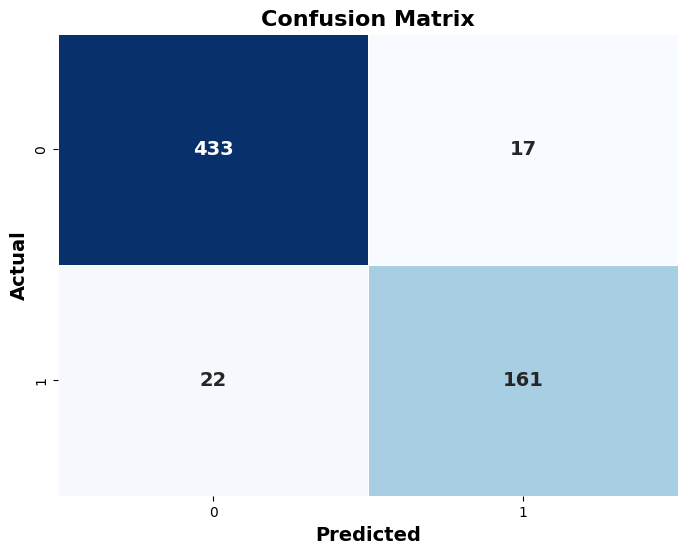

In [71]:
# Compute the confusion matrix
confusion = confusion_matrix(y_train, cross_validation_pred)

# Create a heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [72]:
# show the feature importance 
importance = XGboostModel.feature_importances_
importance

array([0.06000493, 0.01813112, 0.03272574, 0.00908601, 0.02431762,
       0.01368822, 0.03254443, 0.01932396, 0.03995979, 0.02152743,
       0.40036055, 0.00863639, 0.01219061, 0.03361325, 0.01247017,
       0.24919635, 0.0122235 ], dtype=float32)

In [73]:
# columns
columns = X.columns

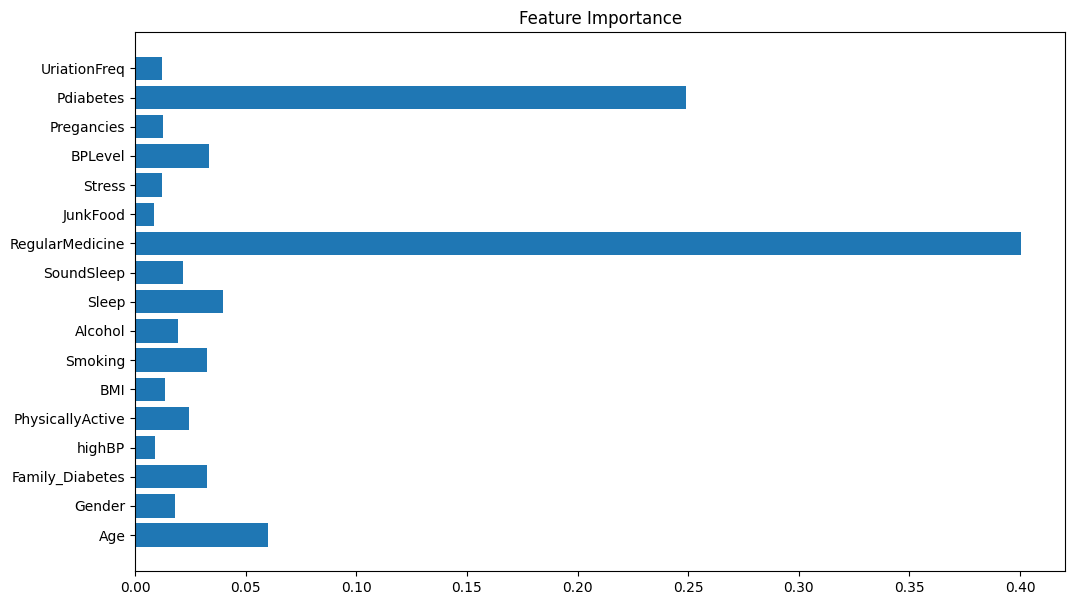

In [74]:
# plot the Feature Importance
plt.figure(figsize=(12, 7))
plt.barh(y=columns, width=importance)
plt.title("Feature Importance")
plt.show()

In [75]:
# make prediction
y_pred_XGboost = XGboostModel.predict(X_test)
y_pred_XGboost

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [76]:
# prediction
pd.DataFrame(np.c_[y_pred_XGboost, y_test], columns=["prediction", "Actual"])

prediction  Actual
0             1       1
1             0       0
2             0       1
3             1       1
4             1       1
..          ...     ...
267           0       0
268           0       0
269           1       1
270           1       1
271           1       1

[272 rows x 2 columns]

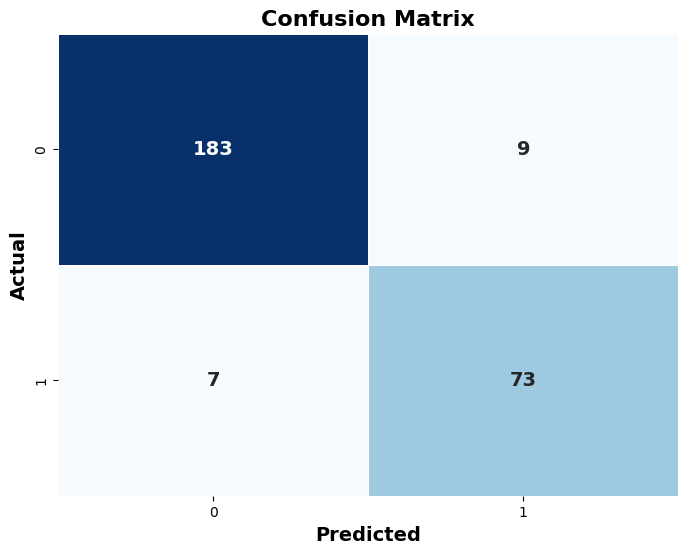

In [77]:
# Compute the confusion matrix on the test
confusion = confusion_matrix(y_test, y_pred_XGboost)

# Create a heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [78]:
print("\033[1mThe Classification Report on Test Data\033[0m\n")
classification_rep = classification_report(y_test, y_pred_XGboost)
print(classification_rep)

The Classification Report on Test Data

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       192
           1       0.89      0.91      0.90        80

    accuracy                           0.94       272
   macro avg       0.93      0.93      0.93       272
weighted avg       0.94      0.94      0.94       272



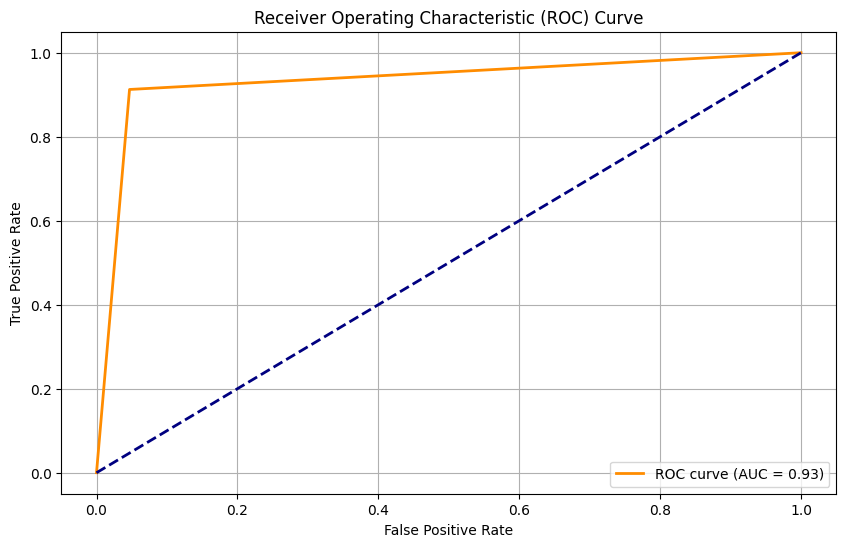

In [79]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_XGboost)
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_XGboost)
average_precision = average_precision_score(y_test, y_pred_XGboost)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [80]:
# the scores
print(f"The Score On The Train => {XGboostModel.score(X_train, y_train)*100:0.2f} %")
print(f"The Score On The Test => {XGboostModel.score(X_test, y_test)*100:0.2f} %")

The Score On The Train => 97.79 %
The Score On The Test => 94.12 %


### `Deep Learning`

In [81]:
# features numbers
X_train.shape[1]

17

In [82]:
# number of classes
len(np.unique(y_train))

2

In [85]:
# bult the model
my_model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1], )),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(len(np.unique(y_train)), activation="sigmoid")
])
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               2304      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                

# ***ANN structure***

<img src="https://devskrol.com/wp-content/uploads/2020/11/TFANN.png" width="1200" height="300">


In [86]:
# compile the model
my_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"], run_eagerly=True)

In [87]:
from tensorflow.keras.utils import to_categorical

num_classes = 2

y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)


In [88]:
# EarlyStopping to prevent overfitting
early_stopping_model = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

# ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='best_model.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1)

# Add both callbacks to the list
callbacks_list = [early_stopping_model, checkpoint]


# Use callbacks_list in your model.fit
history = my_model.fit(x=X_train, y=y_train_encoded, epochs=100,validation_data=(X_test, y_test_encoded), callbacks=callbacks_list)

Epoch 1/100
19/20 [===========================>..] - ETA: 0s - loss: 0.6500 - accuracy: 0.6809
Epoch 1: val_loss improved from inf to 0.59469, saving model to best_model.h5
20/20 [==============================] - 2s 60ms/step - loss: 0.6476 - accuracy: 0.6840 - val_loss: 0.5947 - val_accuracy: 0.7059
Epoch 2/100
 3/20 [===>..........................] - ETA: 0s - loss: 0.5716 - accuracy: 0.7604

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



20/20 [==============================] - ETA: 0s - loss: 0.5526 - accuracy: 0.7109
Epoch 2: val_loss improved from 0.59469 to 0.50500, saving model to best_model.h5
20/20 [==============================] - 1s 59ms/step - loss: 0.5526 - accuracy: 0.7109 - val_loss: 0.5050 - val_accuracy: 0.7059
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.4613 - accuracy: 0.7109
Epoch 3: val_loss improved from 0.50500 to 0.44707, saving model to best_model.h5
20/20 [==============================] - 1s 56ms/step - loss: 0.4613 - accuracy: 0.7109 - val_loss: 0.4471 - val_accuracy: 0.7059
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss: 0.4232 - accuracy: 0.7172
Epoch 4: val_loss improved from 0.44707 to 0.43897, saving model to best_model.h5
20/20 [==============================] - 1s 58ms/step - loss: 0.4232 - accuracy: 0.7172 - val_loss: 0.4390 - val_accuracy: 0.7059
Epoch 5/100
20/20 [==============================] - ETA: 0s - loss: 0.4026 - accuracy: 0.8

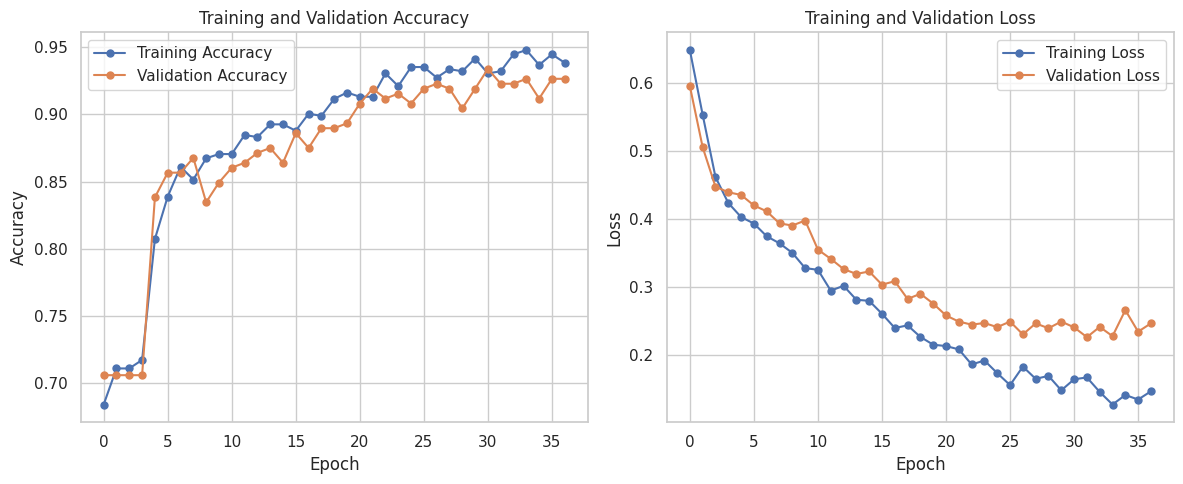

In [89]:
# The style
sns.set(style='whitegrid')

# Plotting training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o', markersize=5)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='-', marker='o', markersize=5)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o', markersize=5)
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='-', marker='o', markersize=5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [90]:
# Evaluate the model on the test set
loss, accuracy = my_model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

9/9 [==============================] - 0s 14ms/step - loss: 0.2263 - accuracy: 0.9228
Test Accuracy: 92.28%
Test Loss: 0.2263


In [114]:
# The Prediction
prediction = my_model.predict(X_test)
prediction[:10]

9/9 [==============================] - 0s 6ms/step


array([[0.01761704, 0.9743205 ],
       [0.9188078 , 0.08447749],
       [0.99418885, 0.00633368],
       [0.0973813 , 0.890115  ],
       [0.16486123, 0.826559  ],
       [0.99491614, 0.00678388],
       [0.9987809 , 0.00166595],
       [0.02809094, 0.9602327 ],
       [0.9487611 , 0.05766395],
       [0.99600554, 0.00474523]], dtype=float32)

In [92]:
predictions = []
for i in range(len(prediction)):
    predictions.append(np.argmax(prediction[i]))
print(predictions[:20])

[1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1]


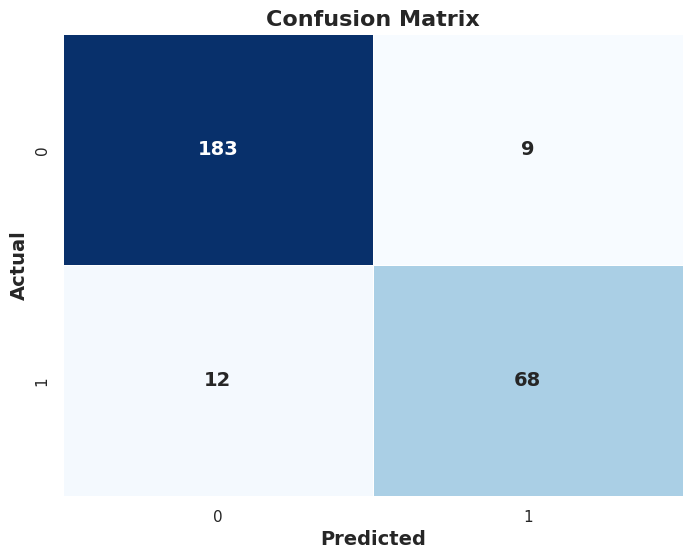

In [93]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, predictions)
# Create a heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [94]:
print("\033[1mThe Classification Report on Test Data\033[0m\n")
classification_rep = classification_report(y_test, predictions)
print(classification_rep)

The Classification Report on Test Data

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       192
           1       0.88      0.85      0.87        80

    accuracy                           0.92       272
   macro avg       0.91      0.90      0.91       272
weighted avg       0.92      0.92      0.92       272



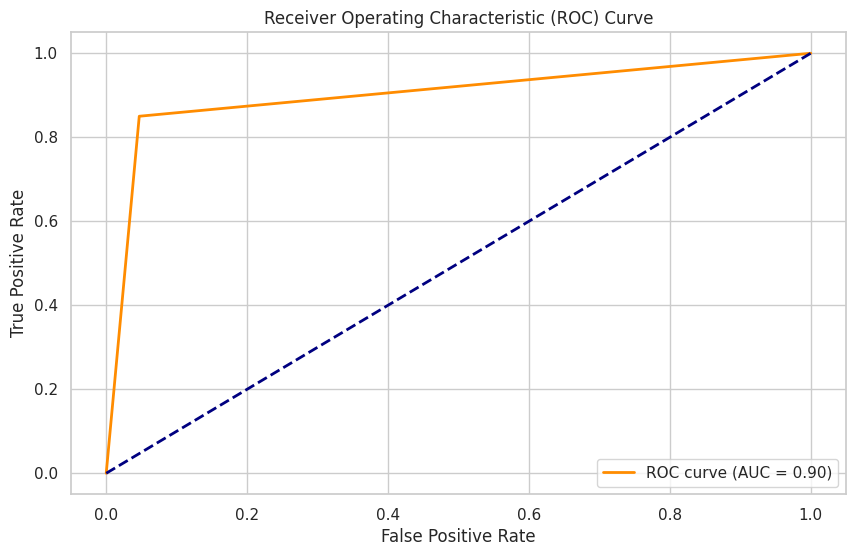

In [95]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, predictions)
average_precision = average_precision_score(y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Final Model

In [96]:
joblib.dump(XGboostModel, "XGboostModel.pkl")

['XGboostModel.pkl']

In [97]:
final_model = joblib.load("XGboostModel.pkl")


In [98]:
# testing
y_pred = final_model.predict(X_test)

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       192
           1       0.89      0.91      0.90        80

    accuracy                           0.94       272
   macro avg       0.93      0.93      0.93       272
weighted avg       0.94      0.94      0.94       272



# By: Mohammed Hamza


LinkedIn https://www.linkedin.com/in/mohammed-hamza-4184b2251/